### EDA + Feature Engineering

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

# import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn import metrics 
from scipy.spatial.distance import cdist

from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance

In [2]:
data = pd.read_csv('/Users/jennihawk/Documents/Data Science3/Clustering Project/Online_Retail.csv', encoding='latin1', parse_dates=["InvoiceDate"]) 

In [3]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [4]:
data.shape

(541909, 8)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


### Date EDA 
- year, month, day as separate columns

In [6]:
data['Year'] = data['InvoiceDate'].dt.year
data['Month'] = data['InvoiceDate'].dt.month
data['Day']= data['InvoiceDate'].dt.day
#data['is_leap_year'] = data['InvoiceDate'].dt.is_leap_year

In [7]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1


#### Don't have two full years of data
- 2010 December and 2011 all months
- Only month we have yoy data is December

In [8]:
data.groupby(['Year', 'Month']).size()

Year  Month
2010  12       42481
2011  1        35147
      2        27707
      3        36748
      4        29916
      5        37030
      6        36874
      7        39518
      8        35284
      9        50226
      10       60742
      11       84711
      12       25525
dtype: int64

#### For month of December, by year, are all days accounted for?
- 2011 data only covers 9 days in December
- 2010 no data after the 23rd in December

In [96]:
data[data.Month==12].groupby(['Year', 'Day']).size()

Year  Day
2010  1      3108
      2      2109
      3      2202
      5      2725
      6      3878
      7      2963
      8      2647
      9      2891
      10     2758
      12     1451
      13     2283
      14     2087
      15     1349
      16     1790
      17     3115
      19      522
      20     1763
      21     1586
      22      291
      23      963
2011  1      2901
      2      2880
      4      2038
      5      5331
      6      3365
      7      2438
      8      4940
      9      1632
dtype: int64

In [10]:
data.Year.unique()

array([2010, 2011])

In [11]:
data.Month.unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

#### Review Unique Values by Column

In [12]:
data.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [13]:
#data.Country.value_counts()

In [14]:
data.Country.nunique()

38

In [15]:
data.InvoiceNo.nunique()

25900

In [16]:
data.Description.nunique()

4223

In [17]:
data.StockCode.nunique()

4070

In [18]:
data.CustomerID.nunique()

4372

#### Review Customer ID Nulls 

In [19]:
check_null = data[data['CustomerID'].isnull()]

In [20]:
check_null.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom,2010,12,1
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom,2010,12,1
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,2010,12,1
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom,2010,12,1
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom,2010,12,1


#### What countries the nulls come from

In [21]:
# see what countries the nulls come from
check_null.Country.value_counts()

United Kingdom    133600
EIRE                 711
Hong Kong            288
Unspecified          202
Switzerland          125
France                66
Israel                47
Portugal              39
Bahrain                2
Name: Country, dtype: int64

#### Drop Nulls

In [22]:
data_clean = data.dropna()

In [23]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   Year         406829 non-null  int64         
 9   Month        406829 non-null  int64         
 10  Day          406829 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 37.2+ MB


#### Check for negative values in Quantity column and Unit Price column

In [24]:
# mask
filt_negs = data_clean['Quantity'] < 0
# pass mask to dataframe. Selects only true rows.
data_clean[filt_negs]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,2010,12,1
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,2010,12,1
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,2010,12,1
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010,12,1
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010,12,1
...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,2011,12,9
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,2011,12,9
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,2011,12,9
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,2011,12,9


#### For project, assume negative values should be positive values. Turn negative vals into positive vals.

In [25]:
data_clean['Quantity'] = data_clean['Quantity'].abs()

/var/folders/j0/364009cj7xnbq46wqpdh5v9m0000gn/T/ipykernel_41989/1238295681.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Quantity'] = data_clean['Quantity'].abs()


In [26]:
#data_clean[filt1]

In [27]:
data_clean.shape

(406829, 11)

How many rows are < 10 quantity?

In [28]:
#qty_look = data_clean['Quantity'] > 10

In [29]:
#data_clean[qty_look]

#### Get total sales per invoice line item

In [30]:
data_clean['Sales'] = data_clean['Quantity'] * data_clean['UnitPrice']

/var/folders/j0/364009cj7xnbq46wqpdh5v9m0000gn/T/ipykernel_41989/1027470476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Sales'] = data_clean['Quantity'] * data_clean['UnitPrice']


#### Review total Sales dollars by year

In [31]:
data_clean.groupby(data_clean.InvoiceDate.dt.year)['Sales'].sum()

InvoiceDate
2010     590823.760
2011    8931926.234
Name: Sales, dtype: float64

In [32]:
data_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,20.34


In [33]:
data_clean.describe()

,Quantity,UnitPrice,CustomerID,Year,Month,Day,Sales
count,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000
mean,13.412279,3.460471,15287.690570,2010.934002,7.605947,15.036128,23.407255
std,248.624170,69.315162,1713.600303,0.248279,3.418942,8.653730,427.437730
min,1.000000,0.000000,12346.000000,2010.000000,1.000000,1.000000,0.000000
25%,2.000000,1.250000,13953.000000,2011.000000,5.000000,7.000000,4.680000
50%,5.000000,1.950000,15152.000000,2011.000000,8.000000,15.000000,11.800000
75%,12.000000,3.750000,16791.000000,2011.000000,11.000000,22.000000,19.800000
max,80995.000000,38970.000000,18287.000000,2011.000000,12.000000,31.000000,168469.600000


### Create UK only 2011 only dataframe

In [34]:
filt_country = data_clean['Country'] == 'United Kingdom'
filt_year = data_clean['Year'] == 2011
filters = filt_country & filt_year

In [35]:
data_clean2 = data_clean[filters]
data_clean2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Sales
42481,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,2011,1,4,19.5
42482,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,2011,1,4,10.5
42483,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,2011,1,4,10.5
42484,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,2011,1,4,10.5
42485,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,2011,1,4,12.5


### Exploration of Customers based on the quantity they order: low, high
- I created some intuitive logic on what would be high / low for a quantity of order. For instance, it would be strange for someone to buy more than 10 novelty items. 

- This workpath explored counting the number of invoice line item rows that were low/high to see how customers fell into these.

- IMPORTANT NOTE: Because these were my rules I ABANDONED THIS APPROACH to not create bias in the algorithm. I left the work in case it helped EDA after the algorithm was run. 

#### Create column to assign quantity high or low
- Assign low, high so we can eventually filter by more nuanced math
- Logic for high > 10: Establishes business purchaser
- Logic for low < 10 Establishes retail purchaser

In [36]:
data_clean2['Quantity_Type'] = np.where(data_clean2['Quantity'] > 10, 'high', 'low')

/var/folders/j0/364009cj7xnbq46wqpdh5v9m0000gn/T/ipykernel_41989/656606254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean2['Quantity_Type'] = np.where(data_clean2['Quantity'] > 10, 'high', 'low')


In [37]:
data_clean2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Sales,Quantity_Type
42481,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,2011,1,4,19.5,low
42482,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,2011,1,4,10.5,high
42483,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,2011,1,4,10.5,high
42484,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,2011,1,4,10.5,low
42485,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,2011,1,4,12.5,low


#### Dataframes that tell you how many rows of high values and low values you have

In [38]:
#counting per customer ID how many rows of highs there are
high_df = data_clean2[data_clean2.Quantity_Type=='high'].groupby(['CustomerID']).size().reset_index(name = 'High_Qty_Row_Count')

In [92]:
high_df.head()

,CustomerID,High_Qty_Row_Count
0,12346.0,2
1,12747.0,40
2,12748.0,483
3,12749.0,53
4,12820.0,34


In [40]:
#counting per customer ID how many rows of lows there are
low_df = data_clean2[data_clean2.Quantity_Type=='low'].groupby(['CustomerID']).size().reset_index(name='Low_Qty_Row_Count')

In [93]:
low_df.head()

,CustomerID,Low_Qty_Row_Count
0,12747.0,48
1,12748.0,3489
2,12749.0,178
3,12820.0,25
4,12821.0,2


In [42]:
customer_df = pd.merge(low_df, high_df[['CustomerID', 'High_Qty_Row_Count']], on='CustomerID')
customer_df.head()

,CustomerID,Low_Qty_Row_Count,High_Qty_Row_Count
0,12747.0,48,40
1,12748.0,3489,483
2,12749.0,178,53
3,12820.0,25,34
4,12821.0,2,4


#### Column Definitions
- High_Qty_Row_Count = number of rows per customer that ordered a high quantity per that line item
- Low_Qty_Row_Count = number of rows per customer that ordered a high quantity per that line item

In [94]:
customer_df['invoice_lines_count'] = customer_df.High_Qty_Row_Count + customer_df.Low_Qty_Row_Count
customer_df.head()

,CustomerID,Low_Qty_Row_Count,High_Qty_Row_Count,invoice_lines_count,High_Qty_Perc,Low_Qty_Perc,Retail_Buyer,Biz_Buyer,Combo_Buyer,customer_type,Annual_Spend,Num_Orders,Unique_Month,Num_Unique_Stock,Sum_Qty
0,12747.0,48,40,88,0.454545,0.545455,False,False,True,combo_buyer,3489.74,88,8,39,1062
1,12748.0,3489,483,3972,0.121601,0.878399,True,False,False,Retail_Buyer,34088.78,3972,12,1603,24439
2,12749.0,178,53,231,0.229437,0.770563,False,False,True,combo_buyer,4313.56,231,4,160,1520
3,12820.0,25,34,59,0.576271,0.423729,False,False,True,combo_buyer,942.34,59,4,55,722
4,12821.0,2,4,6,0.666667,0.333333,False,False,True,combo_buyer,92.72,6,1,6,70


#### Create high + low qty percent columns
- Remember! these are percent of line item rows that have been designated as high qty or low qty line item orders

In [44]:
customer_df['High_Qty_Perc'] = customer_df['High_Qty_Row_Count'] / customer_df['invoice_lines_count']

In [45]:
customer_df['Low_Qty_Perc'] = customer_df['Low_Qty_Row_Count'] / customer_df['invoice_lines_count']

In [46]:
customer_df.head()

,CustomerID,Low_Qty_Row_Count,High_Qty_Row_Count,invoice_lines_count,High_Qty_Perc,Low_Qty_Perc
0,12747.0,48,40,88,0.454545,0.545455
1,12748.0,3489,483,3972,0.121601,0.878399
2,12749.0,178,53,231,0.229437,0.770563
3,12820.0,25,34,59,0.576271,0.423729
4,12821.0,2,4,6,0.666667,0.333333


#### Buyers based on qty 

In [47]:
customer_df['Retail_Buyer'] = customer_df['High_Qty_Perc'].apply(lambda x: 'True' if x <= .20 else 'False')
customer_df['Biz_Buyer'] = customer_df['High_Qty_Perc'].apply(lambda x: 'True' if x > .80 else 'False')
customer_df['Combo_Buyer'] = customer_df['High_Qty_Perc'].apply(lambda x: 'True' if ((x >= .20) & (x <.80)) else 'False')

In [95]:
customer_df

,CustomerID,Low_Qty_Row_Count,High_Qty_Row_Count,invoice_lines_count,High_Qty_Perc,Low_Qty_Perc,Retail_Buyer,Biz_Buyer,Combo_Buyer,customer_type,Annual_Spend,Num_Orders,Unique_Month,Num_Unique_Stock,Sum_Qty
0,12747.0,48,40,88,0.454545,0.545455,False,False,True,combo_buyer,3489.74,88,8,39,1062
1,12748.0,3489,483,3972,0.121601,0.878399,True,False,False,Retail_Buyer,34088.78,3972,12,1603,24439
2,12749.0,178,53,231,0.229437,0.770563,False,False,True,combo_buyer,4313.56,231,4,160,1520
3,12820.0,25,34,59,0.576271,0.423729,False,False,True,combo_buyer,942.34,59,4,55,722
4,12821.0,2,4,6,0.666667,0.333333,False,False,True,combo_buyer,92.72,6,1,6,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3404,18278.0,6,3,9,0.333333,0.666667,False,False,True,combo_buyer,173.90,9,1,9,66
3405,18281.0,4,3,7,0.428571,0.571429,False,False,True,combo_buyer,80.82,7,1,7,54
3406,18282.0,11,2,13,0.153846,0.846154,True,False,False,Retail_Buyer,179.50,13,2,12,108
3407,18283.0,750,6,756,0.007937,0.992063,True,False,False,Retail_Buyer,2094.88,756,10,263,1397


In [49]:
customer_df['customer_type'] = customer_df['High_Qty_Perc'].apply(lambda x: 'Retail_Buyer' if x < .20 else ('combo_buyer' if x < .80 else 'biz_buyer'))

#### When feeding to algorithm:
- Keep Retail Buyer and Combo buyer because they translate to 1s and 0s. 

In [50]:
customer_df

,CustomerID,Low_Qty_Row_Count,High_Qty_Row_Count,invoice_lines_count,High_Qty_Perc,Low_Qty_Perc,Retail_Buyer,Biz_Buyer,Combo_Buyer,customer_type
0,12747.0,48,40,88,0.454545,0.545455,False,False,True,combo_buyer
1,12748.0,3489,483,3972,0.121601,0.878399,True,False,False,Retail_Buyer
2,12749.0,178,53,231,0.229437,0.770563,False,False,True,combo_buyer
3,12820.0,25,34,59,0.576271,0.423729,False,False,True,combo_buyer
4,12821.0,2,4,6,0.666667,0.333333,False,False,True,combo_buyer
...,...,...,...,...,...,...,...,...,...,...
3404,18278.0,6,3,9,0.333333,0.666667,False,False,True,combo_buyer
3405,18281.0,4,3,7,0.428571,0.571429,False,False,True,combo_buyer
3406,18282.0,11,2,13,0.153846,0.846154,True,False,False,Retail_Buyer
3407,18283.0,750,6,756,0.007937,0.992063,True,False,False,Retail_Buyer


<AxesSubplot:xlabel='customer_type', ylabel='High_Qty_Perc'>

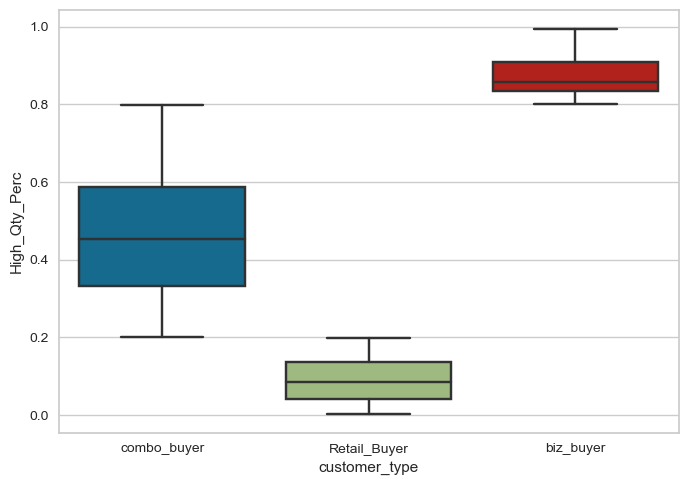

In [51]:
sns.boxplot(data=customer_df, x = 'customer_type', y = 'High_Qty_Perc')

<AxesSubplot:xlabel='customer_type', ylabel='High_Qty_Row_Count'>

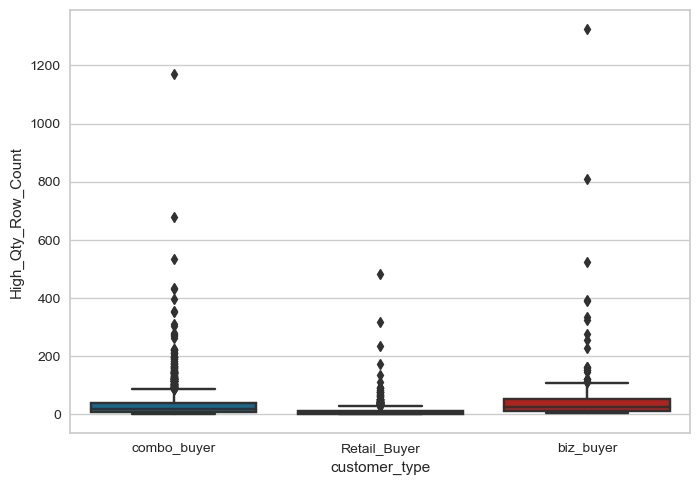

In [52]:
sns.boxplot(data=customer_df, x = 'customer_type', y = 'High_Qty_Row_Count')

<AxesSubplot:xlabel='customer_type', ylabel='High_Qty_Row_Count'>

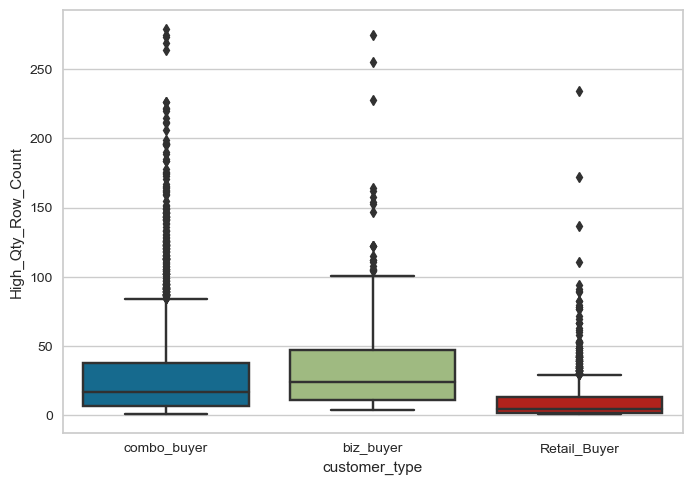

In [53]:
sns.boxplot(data=customer_df[customer_df.High_Qty_Row_Count < 300], x = 'customer_type', y = 'High_Qty_Row_Count')

### Quantity: Review Distribution

In [54]:
data_clean2.Quantity.describe()

count    337342.000000
mean         12.591616
std         271.720534
min           1.000000
25%           2.000000
50%           4.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Quantity'>

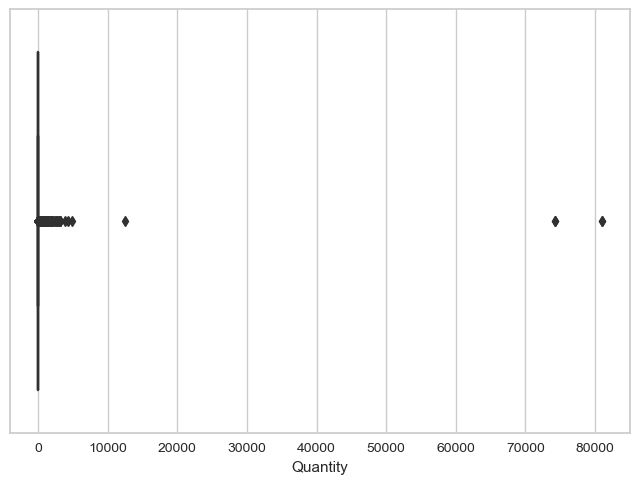

In [55]:
sns.boxplot(data_clean2['Quantity'])

### Annual Spend Feature Creation

In [56]:
spend = data_clean2.groupby(['CustomerID']).agg(Annual_Spend = ('Sales', 'sum')).reset_index()

In [57]:
spend.head()

,CustomerID,Annual_Spend
0,12346.0,154367.20
1,12747.0,3489.74
2,12748.0,34088.78
3,12749.0,4313.56
4,12820.0,942.34


In [58]:
spend.describe()

,CustomerID,Annual_Spend
count,3835.000000,3835.000000
mean,15550.676662,1912.747263
std,1575.054051,9106.579015
min,12346.000000,0.000000
25%,14197.000000,296.090000
50%,15556.000000,642.020000
75%,16905.500000,1570.675000
max,18287.000000,336942.100000


In [59]:
spend_filt = spend['Annual_Spend'] == 0

In [60]:
spend[spend_filt]

,CustomerID,Annual_Spend
311,13256.0,0.0


#### Drop 0.0 spend

In [61]:
spend = spend[spend.Annual_Spend != 0]

In [62]:
spend.describe()

,CustomerID,Annual_Spend
count,3834.000000,3834.000000
mean,15551.275170,1913.246154
std,1574.823287,9107.714442
min,12346.000000,2.950000
25%,14198.250000,296.347500
50%,15556.500000,642.410000
75%,16905.750000,1570.897500
max,18287.000000,336942.100000


#### Include Annual Spend on customer_df

In [63]:
customer_df = pd.merge(customer_df, spend[['CustomerID', 'Annual_Spend']], on = 'CustomerID')

In [91]:
customer_df.head()

,CustomerID,Low_Qty_Row_Count,High_Qty_Row_Count,invoice_lines_count,High_Qty_Perc,Low_Qty_Perc,Retail_Buyer,Biz_Buyer,Combo_Buyer,customer_type,Annual_Spend,Num_Orders,Unique_Month,Num_Unique_Stock,Sum_Qty
0,12747.0,48,40,88,0.454545,0.545455,False,False,True,combo_buyer,3489.74,88,8,39,1062
1,12748.0,3489,483,3972,0.121601,0.878399,True,False,False,Retail_Buyer,34088.78,3972,12,1603,24439
2,12749.0,178,53,231,0.229437,0.770563,False,False,True,combo_buyer,4313.56,231,4,160,1520
3,12820.0,25,34,59,0.576271,0.423729,False,False,True,combo_buyer,942.34,59,4,55,722
4,12821.0,2,4,6,0.666667,0.333333,False,False,True,combo_buyer,92.72,6,1,6,70


### Number of Invoices per Customer Feature

In [65]:
invoice_df = data_clean2.groupby('CustomerID')['InvoiceNo'].count().reset_index(name = 'Num_Orders')

In [66]:
invoice_df

,CustomerID,Num_Orders
0,12346.0,2
1,12747.0,88
2,12748.0,3972
3,12749.0,231
4,12820.0,59
...,...,...
3830,18280.0,10
3831,18281.0,7
3832,18282.0,13
3833,18283.0,756


In [67]:
customer_df = pd.merge(customer_df, invoice_df[['CustomerID', 'Num_Orders']], on = 'CustomerID')

In [90]:
customer_df.head()

,CustomerID,Low_Qty_Row_Count,High_Qty_Row_Count,invoice_lines_count,High_Qty_Perc,Low_Qty_Perc,Retail_Buyer,Biz_Buyer,Combo_Buyer,customer_type,Annual_Spend,Num_Orders,Unique_Month,Num_Unique_Stock,Sum_Qty
0,12747.0,48,40,88,0.454545,0.545455,False,False,True,combo_buyer,3489.74,88,8,39,1062
1,12748.0,3489,483,3972,0.121601,0.878399,True,False,False,Retail_Buyer,34088.78,3972,12,1603,24439
2,12749.0,178,53,231,0.229437,0.770563,False,False,True,combo_buyer,4313.56,231,4,160,1520
3,12820.0,25,34,59,0.576271,0.423729,False,False,True,combo_buyer,942.34,59,4,55,722
4,12821.0,2,4,6,0.666667,0.333333,False,False,True,combo_buyer,92.72,6,1,6,70


In [69]:
num_month = data_clean2.groupby('CustomerID')['Month'].nunique().reset_index(name = 'Unique_Month')

In [89]:
num_month.head()

,CustomerID,Unique_Month
0,12346.0,1
1,12747.0,8
2,12748.0,12
3,12749.0,4
4,12820.0,4


In [71]:
customer_df = pd.merge(customer_df, num_month[['CustomerID', 'Unique_Month']], on = 'CustomerID')

In [88]:
customer_df.head()

,CustomerID,Low_Qty_Row_Count,High_Qty_Row_Count,invoice_lines_count,High_Qty_Perc,Low_Qty_Perc,Retail_Buyer,Biz_Buyer,Combo_Buyer,customer_type,Annual_Spend,Num_Orders,Unique_Month,Num_Unique_Stock,Sum_Qty
0,12747.0,48,40,88,0.454545,0.545455,False,False,True,combo_buyer,3489.74,88,8,39,1062
1,12748.0,3489,483,3972,0.121601,0.878399,True,False,False,Retail_Buyer,34088.78,3972,12,1603,24439
2,12749.0,178,53,231,0.229437,0.770563,False,False,True,combo_buyer,4313.56,231,4,160,1520
3,12820.0,25,34,59,0.576271,0.423729,False,False,True,combo_buyer,942.34,59,4,55,722
4,12821.0,2,4,6,0.666667,0.333333,False,False,True,combo_buyer,92.72,6,1,6,70


### Number of Unique Stock Codes Purchased Feature

In [73]:
stock_code = data_clean2.groupby('CustomerID')['StockCode'].nunique().reset_index(name = 'Num_Unique_Stock')

In [74]:
stock_code

,CustomerID,Num_Unique_Stock
0,12346.0,1
1,12747.0,39
2,12748.0,1603
3,12749.0,160
4,12820.0,55
...,...,...
3830,18280.0,10
3831,18281.0,7
3832,18282.0,12
3833,18283.0,263


In [75]:
customer_df = pd.merge(customer_df, stock_code[['CustomerID', 'Num_Unique_Stock']], on = 'CustomerID')

In [76]:
customer_df.head()

,CustomerID,Low_Qty_Row_Count,High_Qty_Row_Count,invoice_lines_count,High_Qty_Perc,Low_Qty_Perc,Retail_Buyer,Biz_Buyer,Combo_Buyer,customer_type,Annual_Spend,Num_Orders,Unique_Month,Num_Unique_Stock
0,12747.0,48,40,88,0.454545,0.545455,False,False,True,combo_buyer,3489.74,88,8,39
1,12748.0,3489,483,3972,0.121601,0.878399,True,False,False,Retail_Buyer,34088.78,3972,12,1603
2,12749.0,178,53,231,0.229437,0.770563,False,False,True,combo_buyer,4313.56,231,4,160
3,12820.0,25,34,59,0.576271,0.423729,False,False,True,combo_buyer,942.34,59,4,55
4,12821.0,2,4,6,0.666667,0.333333,False,False,True,combo_buyer,92.72,6,1,6


### Quantity Features Created
- Sum of quantity purchased by customer 
- 90th Percentile Feature (True/False) created

In [77]:
quantity_wrk = data_clean2.groupby('CustomerID')['Quantity'].sum().reset_index(name = 'Sum_Qty')

In [78]:
quantity_wrk.head()

,CustomerID,Sum_Qty
0,12346.0,148430
1,12747.0,1062
2,12748.0,24439
3,12749.0,1520
4,12820.0,722


In [79]:
val = quantity_wrk['Sum_Qty'].quantile(.9, interpolation="lower")
val

1982

In [80]:
#Pandas series.ge() is used to compare every element of Caller series with passed series. 
#It returns True for every element which is Greater than or Equal to the element in passed series.
quantity_wrk['90thper'] = quantity_wrk['Sum_Qty'].ge(val).astype(int)

In [81]:
quantity_wrk.head()

,CustomerID,Sum_Qty,90thper
0,12346.0,148430,1
1,12747.0,1062,0
2,12748.0,24439,1
3,12749.0,1520,0
4,12820.0,722,0


In [82]:
#place Sum_Qty on customer_df
customer_df = pd.merge(customer_df, quantity_wrk[['CustomerID', 'Sum_Qty']], on = 'CustomerID')

In [83]:
customer_df.head()

,CustomerID,Low_Qty_Row_Count,High_Qty_Row_Count,invoice_lines_count,High_Qty_Perc,Low_Qty_Perc,Retail_Buyer,Biz_Buyer,Combo_Buyer,customer_type,Annual_Spend,Num_Orders,Unique_Month,Num_Unique_Stock,Sum_Qty
0,12747.0,48,40,88,0.454545,0.545455,False,False,True,combo_buyer,3489.74,88,8,39,1062
1,12748.0,3489,483,3972,0.121601,0.878399,True,False,False,Retail_Buyer,34088.78,3972,12,1603,24439
2,12749.0,178,53,231,0.229437,0.770563,False,False,True,combo_buyer,4313.56,231,4,160,1520
3,12820.0,25,34,59,0.576271,0.423729,False,False,True,combo_buyer,942.34,59,4,55,722
4,12821.0,2,4,6,0.666667,0.333333,False,False,True,combo_buyer,92.72,6,1,6,70


In [84]:
customer_df.columns

Index(['CustomerID', 'Low_Qty_Row_Count', 'High_Qty_Row_Count',
       'invoice_lines_count', 'High_Qty_Perc', 'Low_Qty_Perc', 'Retail_Buyer',
       'Biz_Buyer', 'Combo_Buyer', 'customer_type', 'Annual_Spend',
       'Num_Orders', 'Unique_Month', 'Num_Unique_Stock', 'Sum_Qty'],
      dtype='object')

### Dataframe used for modeling - selected features

In [85]:
df_to_model = customer_df[['CustomerID', 'Annual_Spend','Num_Orders', 'Unique_Month', 'Num_Unique_Stock', 'Sum_Qty']].copy()

In [86]:
df_to_model.head()

,CustomerID,Annual_Spend,Num_Orders,Unique_Month,Num_Unique_Stock,Sum_Qty
0,12747.0,3489.74,88,8,39,1062
1,12748.0,34088.78,3972,12,1603,24439
2,12749.0,4313.56,231,4,160,1520
3,12820.0,942.34,59,4,55,722
4,12821.0,92.72,6,1,6,70


In [87]:
#df_to_model.to_csv('df_to_model.csv', index=False)